# 데이터 불러오기

In [1]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from keras.optimizers import Adam
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
plt.rc('font', family='NanumBarunGothic')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Mounted at /content/drive
/content/drive/MyDrive/KDT/본 프로젝트


In [5]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

   기준_년_코드  기준_분기_코드   자치구    행정동  대분류    상권_코드    중분류         업종명  총_점포수  \
0     2022         1  서대문구  북가좌2동  서비스  2110499     의료         한의원      1   
1     2022         1   노원구   공릉1동   소매  2110433  의류/잡화          안경      1   
2     2022         1   마포구   성산1동   소매  2110548   전자기기  컴퓨터및주변장치판매      4   
3     2022         1   은평구    대조동  서비스  2110481     미용       피부관리실      3   
4     2022         1  영등포구   신길6동  서비스  2110804     교육        예술학원      5   

   점포_수  ...  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수   총_매출_금액  분기당_매출_금액  \
0     1  ...        0     0        0           0  54003138   54003138   
1     1  ...        0     0        0           0  16150022   16150022   
2     4  ...        0     0        0           0  89813767   89813767   
3     3  ...        1     0        0           0   4619842    4619842   
4     5  ...        0     0        0           0   5946480    5946480   

   주중_매출_금액  주말_매출_금액  남성_매출_금액  여성_매출_금액  
0  35504845  18498293   8791373  45211765  
1  1467465

In [6]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)
df['반기'] = df['기준_분기_코드'].map({1:'상반기', 2:'상반기', 3:'하반기', 4:'하반기'})
df['반기'] = df['기준_년_코드'].astype(str) + ' ' + df['반기']

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기', '반기'],
      dtype='object')

In [7]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True).reset_index().drop('index', axis=1)
# df

In [8]:
# 압구정동만 남김
df_ap = df[df.행정동=='압구정동'].reset_index().drop('index', axis=1)

# df_ap

In [9]:
# 분기별 업종별 매출금액 합치기

df_ap_quarter = df_ap.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 인테리어

In [10]:
# 인테리어만 남기기
ap_inte = df_ap_quarter[df_ap_quarter.업종명 == '인테리어'].reset_index().drop('index', axis=1)
ap_inte

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,소매,가구/인테리어,인테리어,압구정동,156886045,15,1,0
1,2017-2,소매,가구/인테리어,인테리어,압구정동,106799535,14,1,2
2,2017-3,소매,가구/인테리어,인테리어,압구정동,46341126,12,0,2
3,2017-4,소매,가구/인테리어,인테리어,압구정동,58349852,26,0,0
4,2018-1,소매,가구/인테리어,인테리어,압구정동,248717499,12,0,0
5,2018-2,소매,가구/인테리어,인테리어,압구정동,196347815,12,0,0
6,2018-3,소매,가구/인테리어,인테리어,압구정동,195384691,11,0,1
7,2018-4,소매,가구/인테리어,인테리어,압구정동,176039254,11,0,0
8,2019-1,소매,가구/인테리어,인테리어,압구정동,200160473,13,2,0
9,2019-2,소매,가구/인테리어,인테리어,압구정동,192428255,13,0,0


## 지표 만들기 : 성장성, 순점포증감률, 시장성

In [11]:
# 기초구역 단위별 선택 업종의 전분기 대비 당기의 매출 증감률을 비교하여 성장 정도를 판단
# 성장성 = 당기 매출액 / 전분기 매출액

# 성장성 추가
# shift() 사용. 참고 : https://seong6496.tistory.com/216

ap_inte['성장성'] = ap_inte['분기당_매출_금액'] / ap_inte['분기당_매출_금액'].shift(1)
# 성장성이 1 이하면 지난분기 대비 이번분기 매출이 줄어든 것. 1 이상이어야 해당 분기 매출 상승.


# # 17년도 1분기 성장성 값은 1로 임의로 정한다. 구할 수가 없어서...
ap_inte['성장성'][0] = 1

ap_inte

<ipython-input-11-bf3759c94033>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_inte['성장성'][0] = 1


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성
0,2017-1,소매,가구/인테리어,인테리어,압구정동,156886045,15,1,0,1.000000
1,2017-2,소매,가구/인테리어,인테리어,압구정동,106799535,14,1,2,0.680746
2,2017-3,소매,가구/인테리어,인테리어,압구정동,46341126,12,0,2,0.433908
3,2017-4,소매,가구/인테리어,인테리어,압구정동,58349852,26,0,0,1.259138
4,2018-1,소매,가구/인테리어,인테리어,압구정동,248717499,12,0,0,4.262522
5,2018-2,소매,가구/인테리어,인테리어,압구정동,196347815,12,0,0,0.789441
6,2018-3,소매,가구/인테리어,인테리어,압구정동,195384691,11,0,1,0.995095
7,2018-4,소매,가구/인테리어,인테리어,압구정동,176039254,11,0,0,0.900988
8,2019-1,소매,가구/인테리어,인테리어,압구정동,200160473,13,2,0,1.137022
9,2019-2,소매,가구/인테리어,인테리어,압구정동,192428255,13,0,0,0.961370


In [12]:
# 개업률, 폐업률, 순점포증감률 추가

ap_inte['개업률'] = (ap_inte['개업점포수'] / ap_inte['총 점포수']) * 100
ap_inte['폐업률'] = (ap_inte['폐업점포수'] / ap_inte['총 점포수']) * 100
ap_inte['순점포증감률'] = ((ap_inte['개업점포수'] - ap_inte['폐업점포수']) / ap_inte['총 점포수']) * 100

ap_inte

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성,개업률,폐업률,순점포증감률
0,2017-1,소매,가구/인테리어,인테리어,압구정동,156886045,15,1,0,1.000000,6.666667,0.000000,6.666667
1,2017-2,소매,가구/인테리어,인테리어,압구정동,106799535,14,1,2,0.680746,7.142857,14.285714,-7.142857
2,2017-3,소매,가구/인테리어,인테리어,압구정동,46341126,12,0,2,0.433908,0.000000,16.666667,-16.666667
3,2017-4,소매,가구/인테리어,인테리어,압구정동,58349852,26,0,0,1.259138,0.000000,0.000000,0.000000
4,2018-1,소매,가구/인테리어,인테리어,압구정동,248717499,12,0,0,4.262522,0.000000,0.000000,0.000000
5,2018-2,소매,가구/인테리어,인테리어,압구정동,196347815,12,0,0,0.789441,0.000000,0.000000,0.000000
6,2018-3,소매,가구/인테리어,인테리어,압구정동,195384691,11,0,1,0.995095,0.000000,9.090909,-9.090909
7,2018-4,소매,가구/인테리어,인테리어,압구정동,176039254,11,0,0,0.900988,0.000000,0.000000,0.000000
8,2019-1,소매,가구/인테리어,인테리어,압구정동,200160473,13,2,0,1.137022,15.384615,0.000000,15.384615
9,2019-2,소매,가구/인테리어,인테리어,압구정동,192428255,13,0,0,0.961370,0.000000,0.000000,0.000000


In [13]:
# 시장성 추가
# 기초구역 단위별 점포당 평균 매출을 시군구의 평균 매출과 비교하여 시군구 평균 대비 시장성을 판단
# 시장성 = (행정동 내 분기 매출액 / 분기 점포수) - (자치구 내 분기 매출액 / 분기 점포수)



################################################################################################################################################################################################

# 자치구 평균 매출을 구하기 위해, 원본 데이터로 잠깐 작업하겠습니다
df_gangnam = df[df['자치구'] == '강남구']

# 자치구 분기별 업종별 매출금액 합치기
df_gangnam_quarter = df_gangnam.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 인테리어만 남기기
gangnam_inte = df_gangnam_quarter[df_gangnam_quarter['업종명'] == '인테리어'].reset_index()

################################################################################################################################################################################################

ap_inte['시장성'] = (ap_inte['분기당_매출_금액'] / ap_inte['총 점포수']) - (gangnam_inte['분기당_매출_금액'] / gangnam_inte['총 점포수'])

ap_inte = ap_inte[['분기', '업종명','분기당_매출_금액', '성장성', '순점포증감률', '시장성']]
ap_inte

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,인테리어,156886045,1.000000,6.666667,-2.410674e+07
1,2017-2,인테리어,106799535,0.680746,-7.142857,-3.366708e+07
2,2017-3,인테리어,46341126,0.433908,-16.666667,-3.640521e+07
3,2017-4,인테리어,58349852,1.259138,0.000000,-4.265813e+07
4,2018-1,인테리어,248717499,4.262522,0.000000,-2.846679e+07
5,2018-2,인테리어,196347815,0.789441,0.000000,-3.637909e+07
6,2018-3,인테리어,195384691,0.995095,-9.090909,-2.327187e+07
7,2018-4,인테리어,176039254,0.900988,0.000000,-2.473113e+07
8,2019-1,인테리어,200160473,1.137022,15.384615,-1.501749e+07
9,2019-2,인테리어,192428255,0.961370,0.000000,-2.496063e+07


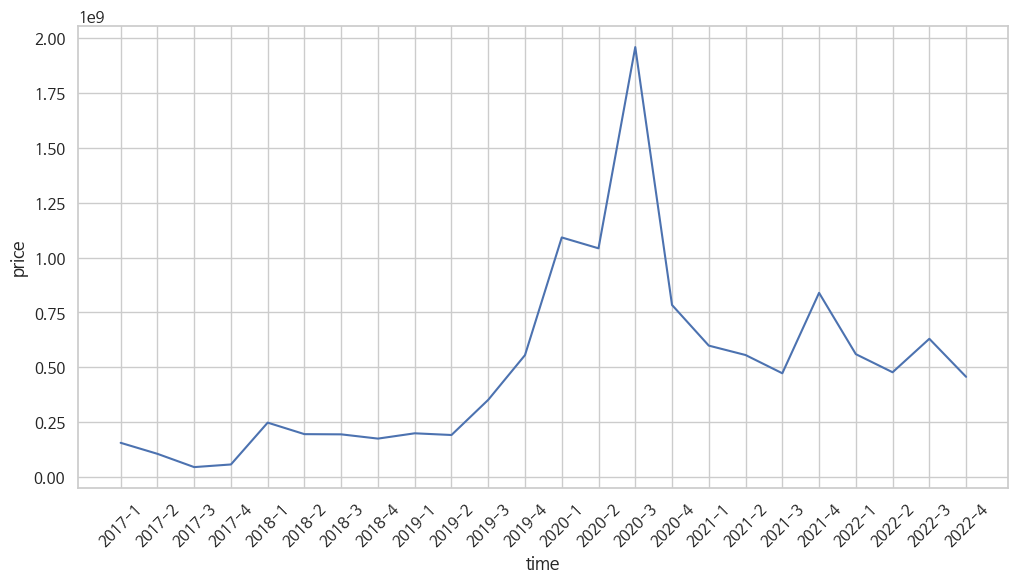

In [15]:
### seaborn lineplot을 이용, 전체 매출 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
sns.set(style="whitegrid", color_codes=True, font='NanumBarunGothic')

plt.figure(figsize=(12, 6))
sns.lineplot(x=ap_inte['분기'], y=ap_inte['분기당_매출_금액'])
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

## 23년 1분기 매출 예측

In [16]:
# 총 매출액을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_inte[['성장성', '시장성', '순점포증감률']]
y = ap_inte.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000 -2.410674e+07   6.666667
1   0.680746 -3.366708e+07  -7.142857
2   0.433908 -3.640521e+07 -16.666667
3   1.259138 -4.265813e+07   0.000000
4   4.262522 -2.846679e+07   0.000000
5   0.789441 -3.637909e+07   0.000000
6   0.995095 -2.327187e+07  -9.090909
7   0.900988 -2.473113e+07   0.000000
8   1.137022 -1.501749e+07  15.384615
9   0.961370 -2.496063e+07   0.000000
10  1.832116 -6.450694e+06   0.000000
11  1.576976  2.650721e+07   7.142857
12  1.962983  4.934945e+07   6.250000
13  0.954698  4.371653e+07   0.000000
14  1.878774  1.010198e+08   0.000000
15  0.400541  3.133567e+07   0.000000
16  0.764192  1.184999e+07   0.000000
17  0.928575  1.409878e+07   0.000000
18  0.850676  1.093290e+07   0.000000
19  1.773210  2.079760e+07   5.882353
20  0.667677  1.493840e+07 -13.333333
21  0.852893  1.033984e+07   6.250000
22  1.318673  1.406364e+07  -6.666667
23  0.725442  1.155490e+07   0.000000
--------------------------------------------------

In [17]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [18]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의
def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)




### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의
def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [19]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [20]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.23773609 0.39478406 0.312     ]
 [0.08412812 0.37732322 0.52      ]]


In [21]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [22]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
# model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [23]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.0161
Epoch 1: val_loss improved from inf to 0.28884, saving model to stock_model.h5
1/1 [==============================] - 9s 9s/step - loss: 0.0161 - val_loss: 0.2888
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.0159
Epoch 2: val_loss improved from 0.28884 to 0.28772, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.0159 - val_loss: 0.2877
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.0157
Epoch 3: val_loss improved from 0.28772 to 0.28660, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.0157 - val_loss: 0.2866
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.0155
Epoch 4: val_loss improved from 0.28660 to 0.28548, saving model to stock_model.h5
1/1 [==============================] - 0s 103ms/step - loss: 0.0155 - val_loss: 0.2855
Epoch 5/300
1/1 [================

In [24]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.10581657]
 [0.09694336]
 [0.08310694]
 [0.10235992]]


In [25]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_inte.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.268952,0.105817
2022-2,0.225820,0.096943
2022-3,0.305510,0.083107
2022-4,0.214973,0.102360


In [26]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_inte.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_inte의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.268952,0.105817,560353007,248574416.0,311778591.0
2022-2,0.225820,0.096943,477921391,231616240.0,246305151.0
2022-3,0.305510,0.083107,630222188,205172480.0,425049708.0
2022-4,0.214973,0.102360,457189880,241968208.0,215221672.0


In [27]:
df_test = df_test.reset_index()

### 결과

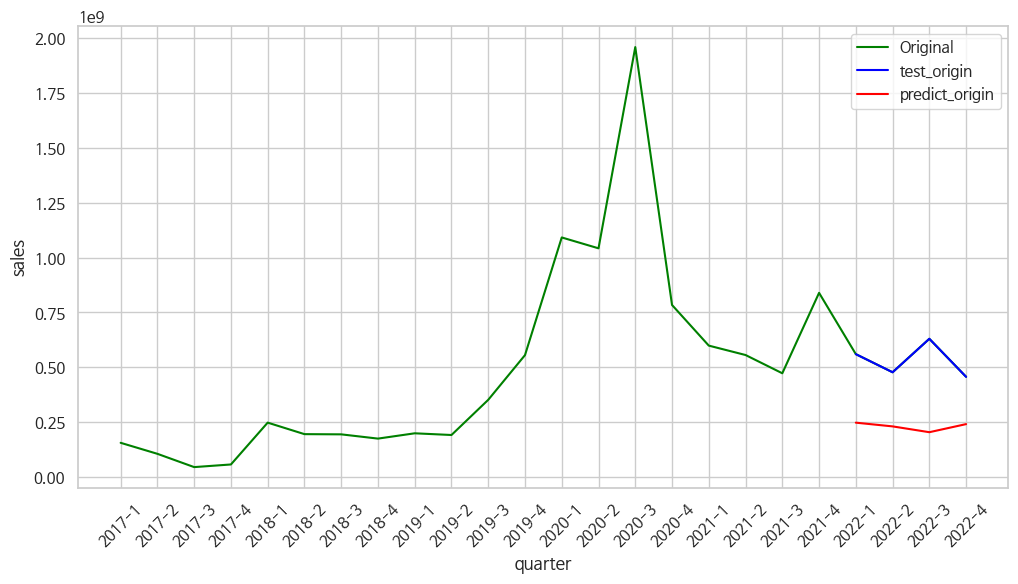

In [28]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_inte['분기'], ap_inte['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [29]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     2.995888e+08
std      9.281880e+07
min      2.152217e+08
25%      2.385343e+08
50%      2.790419e+08
75%      3.400964e+08
max      4.250497e+08
dtype: float64

In [30]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 31ms/step
[[0.08868024]]
--------------------------------------------------------------------------------
예측된 매출  : 215824016.0 


## 23년 1분기 성장성 예측

In [31]:
# 성장을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_inte[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_inte.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

     분기당_매출_금액           시장성     순점포증감률
0    156886045 -2.410674e+07   6.666667
1    106799535 -3.366708e+07  -7.142857
2     46341126 -3.640521e+07 -16.666667
3     58349852 -4.265813e+07   0.000000
4    248717499 -2.846679e+07   0.000000
5    196347815 -3.637909e+07   0.000000
6    195384691 -2.327187e+07  -9.090909
7    176039254 -2.473113e+07   0.000000
8    200160473 -1.501749e+07  15.384615
9    192428255 -2.496063e+07   0.000000
10   352550802 -6.450694e+06   0.000000
11   555964263  2.650721e+07   7.142857
12  1091348515  4.934945e+07   6.250000
13  1041907764  4.371653e+07   0.000000
14  1957509668  1.010198e+08   0.000000
15   784063333  3.133567e+07   0.000000
16   599175104  1.184999e+07   0.000000
17   556378816  1.409878e+07   0.000000
18   473298232  1.093290e+07   0.000000
19   839257270  2.079760e+07   5.882353
20   560353007  1.493840e+07 -13.333333
21   477921391  1.033984e+07   6.250000
22   630222188  1.406364e+07  -6.666667
23   457189880  1.155490e+07   0.000000


In [32]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [33]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [34]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.30550998 0.39478406 0.312     ]
 [0.21497254 0.37732322 0.52      ]]


In [35]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [36]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [37]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1430
Epoch 1: val_loss improved from inf to 0.07389, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1430 - val_loss: 0.0739
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1425
Epoch 2: val_loss improved from 0.07389 to 0.07335, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.1425 - val_loss: 0.0734
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1420
Epoch 3: val_loss improved from 0.07335 to 0.07282, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.1420 - val_loss: 0.0728
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1416
Epoch 4: val_loss improved from 0.07282 to 0.07229, saving model to stock_model.h5
1/1 [==============================] - 0s 101ms/step - loss: 0.1416 - val_loss: 0.0723
Epoch 5/300
1/1 [================

In [38]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 702ms/step
[[0.19687702]
 [0.18608886]
 [0.15757805]
 [0.1935309 ]]


In [39]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_inte.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.069171,0.196877
2022-2,0.117130,0.186089
2022-3,0.237736,0.157578
2022-4,0.084128,0.193531


In [40]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_inte.iloc[-len(pred):, 3].values       # 성장성이 ap_inte의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.069171,0.196877,0.667677,1.160876,-0.493199
2022-2,0.117130,0.186089,0.852893,1.119213,-0.266319
2022-3,0.237736,0.157578,1.318673,1.009105,0.309569
2022-4,0.084128,0.193531,0.725442,1.147954,-0.422511


### 결과

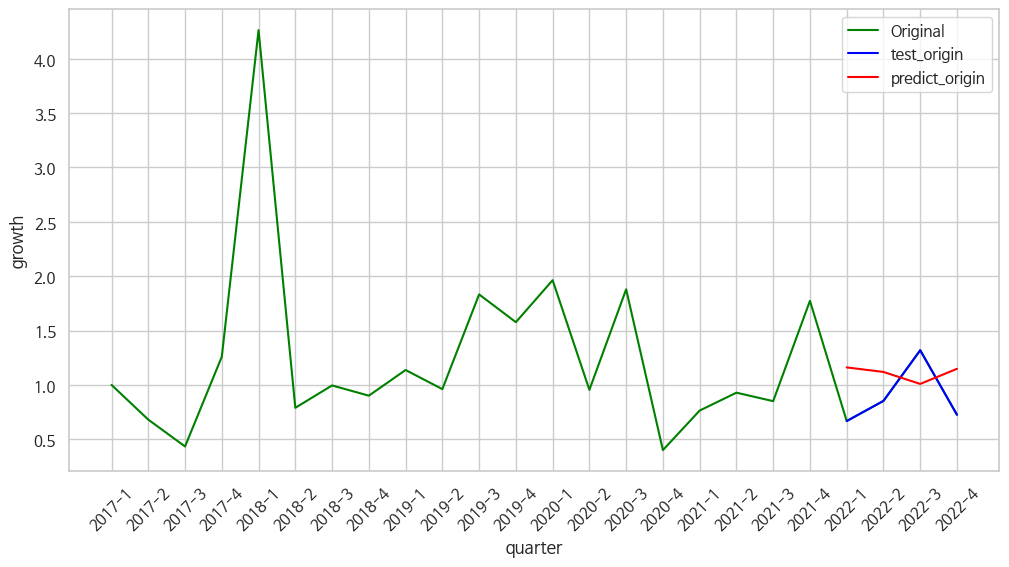

In [41]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_inte['분기'], ap_inte['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [42]:
## error의 요약 통계량
error.describe()

count    4.000000
mean    -0.218115
std      0.364336
min     -0.493199
25%     -0.440183
50%     -0.344415
75%     -0.122347
max      0.309569
dtype: float64

In [43]:
### 23년 1분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 38ms/step
[[0.16756772]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.0476844310760498 


## 23년 1분기 시장성 예측

In [44]:
# 시장성을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_inte[['성장성', '분기당_매출_금액', '순점포증감률']]
y = ap_inte.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액     순점포증감률
0   1.000000   156886045   6.666667
1   0.680746   106799535  -7.142857
2   0.433908    46341126 -16.666667
3   1.259138    58349852   0.000000
4   4.262522   248717499   0.000000
5   0.789441   196347815   0.000000
6   0.995095   195384691  -9.090909
7   0.900988   176039254   0.000000
8   1.137022   200160473  15.384615
9   0.961370   192428255   0.000000
10  1.832116   352550802   0.000000
11  1.576976   555964263   7.142857
12  1.962983  1091348515   6.250000
13  0.954698  1041907764   0.000000
14  1.878774  1957509668   0.000000
15  0.400541   784063333   0.000000
16  0.764192   599175104   0.000000
17  0.928575   556378816   0.000000
18  0.850676   473298232   0.000000
19  1.773210   839257270   5.882353
20  0.667677   560353007 -13.333333
21  0.852893   477921391   6.250000
22  1.318673   630222188  -6.666667
23  0.725442   457189880   0.000000
--------------------------------------------------------------------------------
             시장성
0 

In [45]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [46]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [47]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.23773609 0.30550998 0.312     ]
 [0.08412812 0.21497254 0.52      ]]


In [48]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [49]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [50]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.0427
Epoch 1: val_loss improved from inf to 0.36061, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.0427 - val_loss: 0.3606
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.0424
Epoch 2: val_loss improved from 0.36061 to 0.35933, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.0424 - val_loss: 0.3593
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.0420
Epoch 3: val_loss improved from 0.35933 to 0.35806, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.0420 - val_loss: 0.3581
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.0417
Epoch 4: val_loss improved from 0.35806 to 0.35679, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.0417 - val_loss: 0.3568
Epoch 5/300
1/1 [=================

In [51]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 707ms/step
[[0.17232515]
 [0.161854  ]
 [0.1323241 ]
 [0.16815288]]


In [52]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_inte.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.400872,0.172325
2022-2,0.368866,0.161854
2022-3,0.394784,0.132324
2022-4,0.377323,0.168153


In [53]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_inte.iloc[-len(pred):, 5].values       # 시장성이 ap_inte의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.400872,0.172325,1.493840e+07,-17898802.0,3.283720e+07
2022-2,0.368866,0.161854,1.033984e+07,-19403276.0,2.974312e+07
2022-3,0.394784,0.132324,1.406364e+07,-23646072.0,3.770971e+07
2022-4,0.377323,0.168153,1.155490e+07,-18498264.0,3.005317e+07


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


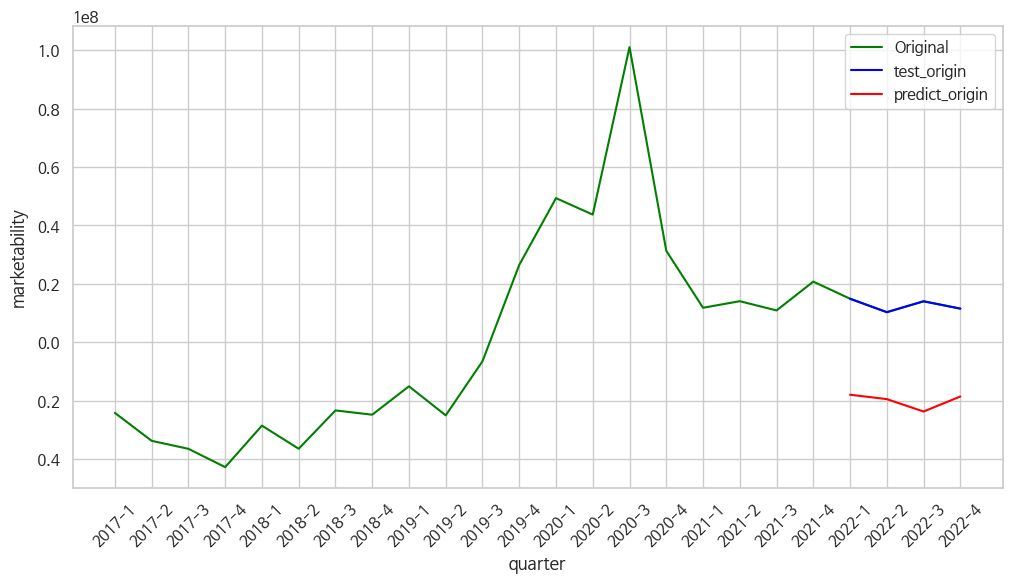

In [54]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_inte['분기'], ap_inte['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [55]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     3.258580e+07
std      3.688394e+06
min      2.974312e+07
25%      2.997565e+07
50%      3.144518e+07
75%      3.405533e+07
max      3.770971e+07
dtype: float64

In [56]:
### 23년 1분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 20ms/step
[[0.14364268]]
--------------------------------------------------------------------------------
예측된 시장성  : -22019842.0 


## 23년 1분기 순점포증감률 예측

In [57]:
# 순점포증감률을 예측하기 위한 지표로는 성장성, 총매출, 시장성 선정

### X / y 데이터 생성
X = ap_inte[['성장성', '분기당_매출_금액', '시장성']]
y = ap_inte.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액           시장성
0   1.000000   156886045 -2.410674e+07
1   0.680746   106799535 -3.366708e+07
2   0.433908    46341126 -3.640521e+07
3   1.259138    58349852 -4.265813e+07
4   4.262522   248717499 -2.846679e+07
5   0.789441   196347815 -3.637909e+07
6   0.995095   195384691 -2.327187e+07
7   0.900988   176039254 -2.473113e+07
8   1.137022   200160473 -1.501749e+07
9   0.961370   192428255 -2.496063e+07
10  1.832116   352550802 -6.450694e+06
11  1.576976   555964263  2.650721e+07
12  1.962983  1091348515  4.934945e+07
13  0.954698  1041907764  4.371653e+07
14  1.878774  1957509668  1.010198e+08
15  0.400541   784063333  3.133567e+07
16  0.764192   599175104  1.184999e+07
17  0.928575   556378816  1.409878e+07
18  0.850676   473298232  1.093290e+07
19  1.773210   839257270  2.079760e+07
20  0.667677   560353007  1.493840e+07
21  0.852893   477921391  1.033984e+07
22  1.318673   630222188  1.406364e+07
23  0.725442   457189880  1.155490e+07
-------------------------

In [58]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [59]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [60]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.23773609 0.30550998 0.39478406]
 [0.08412812 0.21497254 0.37732322]]


In [61]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [62]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [63]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3286
Epoch 1: val_loss improved from inf to 0.35474, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.3286 - val_loss: 0.3547
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3279
Epoch 2: val_loss improved from 0.35474 to 0.35367, saving model to stock_model.h5
1/1 [==============================] - 0s 113ms/step - loss: 0.3279 - val_loss: 0.3537
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3272
Epoch 3: val_loss improved from 0.35367 to 0.35259, saving model to stock_model.h5
1/1 [==============================] - 0s 126ms/step - loss: 0.3272 - val_loss: 0.3526
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3265
Epoch 4: val_loss improved from 0.35259 to 0.35152, saving model to stock_model.h5
1/1 [==============================] - 0s 102ms/step - loss: 0.3265 - val_loss: 0.3515
Epoch 5/300
1/1 [==============

In [64]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 941ms/step
[[0.4687308]
 [0.5162645]
 [0.4264852]
 [0.4476503]]


In [65]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_inte.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.104,0.468731
2022-2,0.715,0.516264
2022-3,0.312,0.426485
2022-4,0.520,0.447650


In [66]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_inte.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_inte의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.104,0.468731,-13.333333,-1.643243,-11.690090
2022-2,0.715,0.516264,6.250000,-0.119728,6.369728
2022-3,0.312,0.426485,-6.666667,-2.997269,-3.669398
2022-4,0.520,0.447650,0.000000,-2.318900,2.318900


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


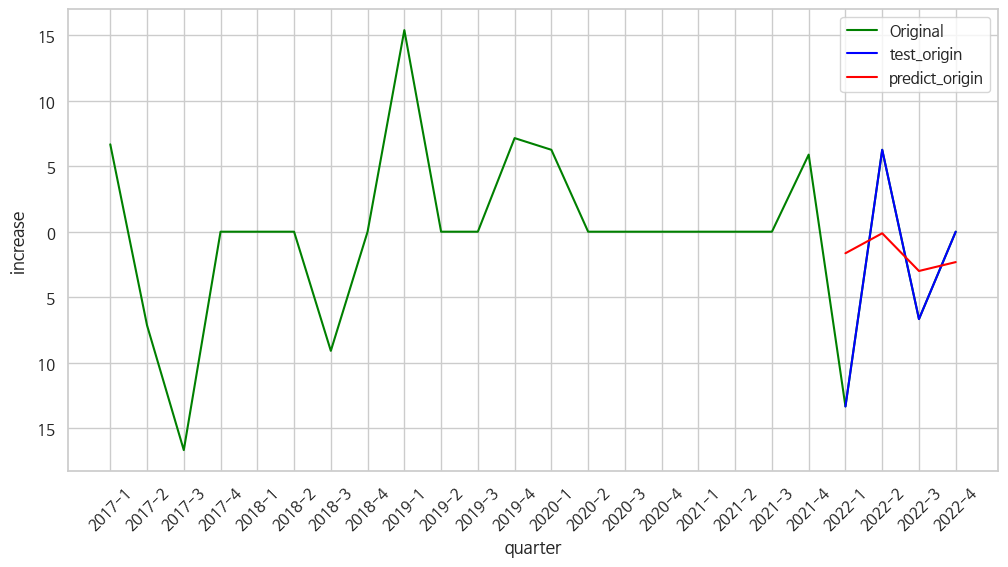

In [67]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_inte['분기'], ap_inte['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [68]:
### error의 요약 통계량
error.describe()

count     4.000000
mean     -1.667715
std       7.851716
min     -11.690090
25%      -5.674571
50%      -0.675249
75%       3.331607
max       6.369728
dtype: float64

In [69]:
### 23년 1분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 31ms/step
[[0.4672149]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.6918296813964844 


## 원본 데이터에 예측값 추가하기

In [70]:
print(sales)
print(growth)
print(marketability)
print(increase)

215824020.0
1.0476844
-22019842.0
-1.6918297


In [71]:
ap_inte.loc[24] = ['2023-1', 'etability]ㅈ', sales, growth, increase, marketability]

<ipython-input-71-48f546e620bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_inte.loc[24] = ['2023-1', 'etability]ㅈ', sales, growth, increase, marketability]


In [72]:
ap_inte

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,인테리어,1.568860e+08,1.000000,6.666667,-2.410674e+07
1,2017-2,인테리어,1.067995e+08,0.680746,-7.142857,-3.366708e+07
2,2017-3,인테리어,4.634113e+07,0.433908,-16.666667,-3.640521e+07
3,2017-4,인테리어,5.834985e+07,1.259138,0.000000,-4.265813e+07
4,2018-1,인테리어,2.487175e+08,4.262522,0.000000,-2.846679e+07
5,2018-2,인테리어,1.963478e+08,0.789441,0.000000,-3.637909e+07
6,2018-3,인테리어,1.953847e+08,0.995095,-9.090909,-2.327187e+07
7,2018-4,인테리어,1.760393e+08,0.900988,0.000000,-2.473113e+07
8,2019-1,인테리어,2.001605e+08,1.137022,15.384615,-1.501749e+07
9,2019-2,인테리어,1.924283e+08,0.961370,0.000000,-2.496063e+07


## 23년 2분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [73]:
### X / y 데이터 생성
X = ap_inte[['성장성', '시장성', '순점포증감률']]
y = ap_inte.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000 -2.410674e+07   6.666667
1   0.680746 -3.366708e+07  -7.142857
2   0.433908 -3.640521e+07 -16.666667
3   1.259138 -4.265813e+07   0.000000
4   4.262522 -2.846679e+07   0.000000
5   0.789441 -3.637909e+07   0.000000
6   0.995095 -2.327187e+07  -9.090909
7   0.900988 -2.473113e+07   0.000000
8   1.137022 -1.501749e+07  15.384615
9   0.961370 -2.496063e+07   0.000000
10  1.832116 -6.450694e+06   0.000000
11  1.576976  2.650721e+07   7.142857
12  1.962983  4.934945e+07   6.250000
13  0.954698  4.371653e+07   0.000000
14  1.878774  1.010198e+08   0.000000
15  0.400541  3.133567e+07   0.000000
16  0.764192  1.184999e+07   0.000000
17  0.928575  1.409878e+07   0.000000
18  0.850676  1.093290e+07   0.000000
19  1.773210  2.079760e+07   5.882353
20  0.667677  1.493840e+07 -13.333333
21  0.852893  1.033984e+07   6.250000
22  1.318673  1.406364e+07  -6.666667
23  0.725442  1.155490e+07   0.000000
24  1.047684 -2.201984e+07  -1.691830
------------

In [74]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [75]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.08412812 0.37732322 0.52      ]
 [0.16756771 0.14364267 0.46721491]]


In [76]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [77]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [78]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.0440
Epoch 1: val_loss improved from inf to 0.25914, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.0440 - val_loss: 0.2591
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.0437
Epoch 2: val_loss improved from 0.25914 to 0.25809, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.0437 - val_loss: 0.2581
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.0434
Epoch 3: val_loss improved from 0.25809 to 0.25704, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.0434 - val_loss: 0.2570
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.0431
Epoch 4: val_loss improved from 0.25704 to 0.25600, saving model to stock_model.h5
1/1 [==============================] - 0s 104ms/step - loss: 0.0431 - val_loss: 0.2560
Epoch 5/300
1/1 [================

In [79]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 644ms/step
[[0.15981293]
 [0.13234814]
 [0.1620742 ]
 [0.14345926]]


In [80]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_inte.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.225820,0.159813
2022-3,0.305510,0.132348
2022-4,0.214973,0.162074
2023-1,0.088680,0.143459


In [81]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_inte.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_inte의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.225820,0.159813,477921391.0,351770592.0,126150799.0
2022-3,0.305510,0.132348,630222188.0,299280736.0,330941452.0
2022-4,0.214973,0.162074,457189880.0,356092224.0,101097656.0
2023-1,0.088680,0.143459,215824016.0,320515968.0,-104691952.0


In [82]:
df_test = df_test.reset_index()

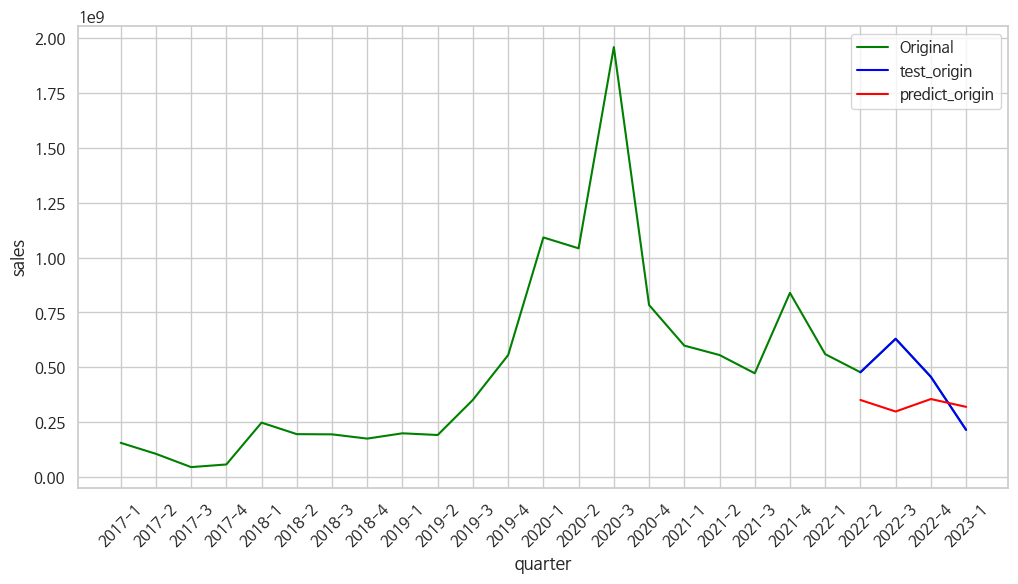

In [83]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_inte['분기'], ap_inte['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [84]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     1.133745e+08
std      1.781407e+08
min     -1.046920e+08
25%      4.965025e+07
50%      1.136242e+08
75%      1.773485e+08
max      3.309415e+08
dtype: float64

In [85]:
### 23년 2분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 23ms/step
[[0.14660712]]
--------------------------------------------------------------------------------
예측된 매출  : 326532032.0 


### 성장성

In [86]:
### X / y 데이터 생성
X = ap_inte[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_inte.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성     순점포증감률
0   1.568860e+08 -2.410674e+07   6.666667
1   1.067995e+08 -3.366708e+07  -7.142857
2   4.634113e+07 -3.640521e+07 -16.666667
3   5.834985e+07 -4.265813e+07   0.000000
4   2.487175e+08 -2.846679e+07   0.000000
5   1.963478e+08 -3.637909e+07   0.000000
6   1.953847e+08 -2.327187e+07  -9.090909
7   1.760393e+08 -2.473113e+07   0.000000
8   2.001605e+08 -1.501749e+07  15.384615
9   1.924283e+08 -2.496063e+07   0.000000
10  3.525508e+08 -6.450694e+06   0.000000
11  5.559643e+08  2.650721e+07   7.142857
12  1.091349e+09  4.934945e+07   6.250000
13  1.041908e+09  4.371653e+07   0.000000
14  1.957510e+09  1.010198e+08   0.000000
15  7.840633e+08  3.133567e+07   0.000000
16  5.991751e+08  1.184999e+07   0.000000
17  5.563788e+08  1.409878e+07   0.000000
18  4.732982e+08  1.093290e+07   0.000000
19  8.392573e+08  2.079760e+07   5.882353
20  5.603530e+08  1.493840e+07 -13.333333
21  4.779214e+08  1.033984e+07   6.250000
22  6.302222e+08  1.406364e+07  -6

In [87]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [88]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.21497254 0.37732322 0.52      ]
 [0.08868024 0.14364267 0.46721491]]


In [89]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [90]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [91]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1464
Epoch 1: val_loss improved from inf to 0.05240, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.1464 - val_loss: 0.0524
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1459
Epoch 2: val_loss improved from 0.05240 to 0.05195, saving model to stock_model.h5
1/1 [==============================] - 0s 99ms/step - loss: 0.1459 - val_loss: 0.0520
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1454
Epoch 3: val_loss improved from 0.05195 to 0.05151, saving model to stock_model.h5
1/1 [==============================] - 0s 99ms/step - loss: 0.1454 - val_loss: 0.0515
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1449
Epoch 4: val_loss improved from 0.05151 to 0.05107, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.1449 - val_loss: 0.0511
Epoch 5/300
1/1 [=================

In [92]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 633ms/step
[[0.14867525]
 [0.12646987]
 [0.15418713]
 [0.13417982]]


In [93]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_inte.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.117130,0.148675
2022-3,0.237736,0.126470
2022-4,0.084128,0.154187
2023-1,0.167568,0.134180


In [94]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_inte.iloc[-len(pred):, 3].values       # 성장성이 ap_inte의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.117130,0.148675,0.852893,0.974722,-0.121829
2022-3,0.237736,0.126470,1.318673,0.888965,0.429708
2022-4,0.084128,0.154187,0.725442,0.996009,-0.270566
2023-1,0.167568,0.134180,1.047684,0.918741,0.128943


In [95]:
df_test = df_test.reset_index()

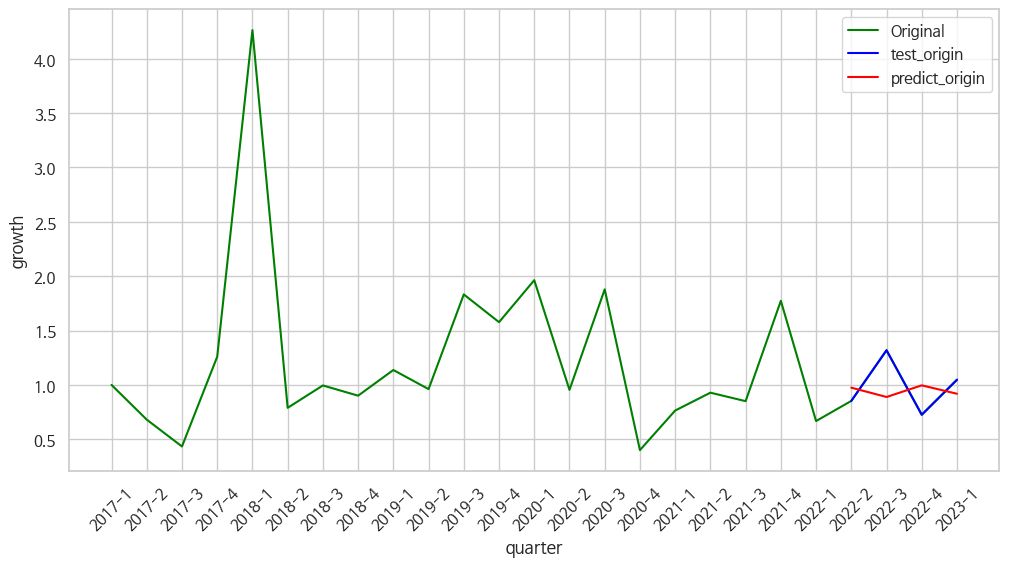

In [96]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_inte['분기'], ap_inte['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [97]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.041564
std      0.306819
min     -0.270566
25%     -0.159013
50%      0.003557
75%      0.204135
max      0.429708
dtype: float64

In [98]:
### 23년 2분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 19ms/step
[[0.14394446]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9564518332481384 


### 시장성

In [99]:
### X / y 데이터 생성
X = ap_inte[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_inte.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성     순점포증감률
0   1.568860e+08  1.000000   6.666667
1   1.067995e+08  0.680746  -7.142857
2   4.634113e+07  0.433908 -16.666667
3   5.834985e+07  1.259138   0.000000
4   2.487175e+08  4.262522   0.000000
5   1.963478e+08  0.789441   0.000000
6   1.953847e+08  0.995095  -9.090909
7   1.760393e+08  0.900988   0.000000
8   2.001605e+08  1.137022  15.384615
9   1.924283e+08  0.961370   0.000000
10  3.525508e+08  1.832116   0.000000
11  5.559643e+08  1.576976   7.142857
12  1.091349e+09  1.962983   6.250000
13  1.041908e+09  0.954698   0.000000
14  1.957510e+09  1.878774   0.000000
15  7.840633e+08  0.400541   0.000000
16  5.991751e+08  0.764192   0.000000
17  5.563788e+08  0.928575   0.000000
18  4.732982e+08  0.850676   0.000000
19  8.392573e+08  1.773210   5.882353
20  5.603530e+08  0.667677 -13.333333
21  4.779214e+08  0.852893   6.250000
22  6.302222e+08  1.318673  -6.666667
23  4.571899e+08  0.725442   0.000000
24  2.158240e+08  1.047684  -1.691830
------------

In [100]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [101]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.21497254 0.08412812 0.52      ]
 [0.08868024 0.16756771 0.46721491]]


In [102]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [103]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [104]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.0801
Epoch 1: val_loss improved from inf to 0.32050, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.0801 - val_loss: 0.3205
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.0796
Epoch 2: val_loss improved from 0.32050 to 0.31933, saving model to stock_model.h5
1/1 [==============================] - 0s 111ms/step - loss: 0.0796 - val_loss: 0.3193
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.0792
Epoch 3: val_loss improved from 0.31933 to 0.31816, saving model to stock_model.h5
1/1 [==============================] - 0s 100ms/step - loss: 0.0792 - val_loss: 0.3182
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.0788
Epoch 4: val_loss improved from 0.31816 to 0.31700, saving model to stock_model.h5
1/1 [==============================] - 0s 102ms/step - loss: 0.0788 - val_loss: 0.3170
Epoch 5/300
1/1 [==============

In [105]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.23780155]
 [0.18778193]
 [0.235889  ]
 [0.2050811 ]]


In [106]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_inte.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.368866,0.237802
2022-3,0.394784,0.187782
2022-4,0.377323,0.235889
2023-1,0.143643,0.205081


In [107]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_inte.iloc[-len(pred):, 5].values       # 시장성이 ap_inte의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.368866,0.237802,1.033984e+07,-8491286.0,1.883113e+07
2022-3,0.394784,0.187782,1.406364e+07,-15678004.0,2.974164e+07
2022-4,0.377323,0.235889,1.155490e+07,-8766078.0,2.032098e+07
2023-1,0.143643,0.205081,-2.201984e+07,-13192493.0,-8.827349e+06


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


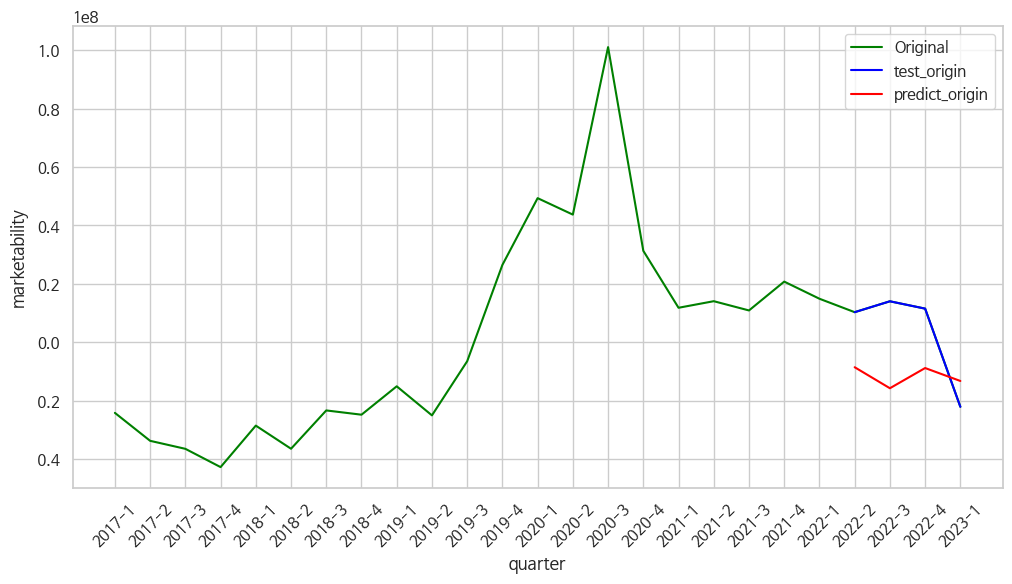

In [108]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_inte['분기'], ap_inte['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [109]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     1.501660e+07
std      1.661373e+07
min     -8.827349e+06
25%      1.191651e+07
50%      1.957605e+07
75%      2.267615e+07
max      2.974164e+07
dtype: float64

In [110]:
### 23년 2분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 29ms/step
[[0.21140206]]
--------------------------------------------------------------------------------
예측된 시장성  : -12284312.0 


### 순점포증감률

In [111]:
### X / y 데이터 생성
X = ap_inte[['분기당_매출_금액', '성장성', '시장성']]
y = ap_inte.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   1.568860e+08  1.000000 -2.410674e+07
1   1.067995e+08  0.680746 -3.366708e+07
2   4.634113e+07  0.433908 -3.640521e+07
3   5.834985e+07  1.259138 -4.265813e+07
4   2.487175e+08  4.262522 -2.846679e+07
5   1.963478e+08  0.789441 -3.637909e+07
6   1.953847e+08  0.995095 -2.327187e+07
7   1.760393e+08  0.900988 -2.473113e+07
8   2.001605e+08  1.137022 -1.501749e+07
9   1.924283e+08  0.961370 -2.496063e+07
10  3.525508e+08  1.832116 -6.450694e+06
11  5.559643e+08  1.576976  2.650721e+07
12  1.091349e+09  1.962983  4.934945e+07
13  1.041908e+09  0.954698  4.371653e+07
14  1.957510e+09  1.878774  1.010198e+08
15  7.840633e+08  0.400541  3.133567e+07
16  5.991751e+08  0.764192  1.184999e+07
17  5.563788e+08  0.928575  1.409878e+07
18  4.732982e+08  0.850676  1.093290e+07
19  8.392573e+08  1.773210  2.079760e+07
20  5.603530e+08  0.667677  1.493840e+07
21  4.779214e+08  0.852893  1.033984e+07
22  6.302222e+08  1.318673  1.406364e+07
23  4.571899e+08

In [112]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [113]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.21497254 0.08412812 0.37732322]
 [0.08868024 0.16756771 0.14364267]]


In [114]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [115]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [116]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3522
Epoch 1: val_loss improved from inf to 0.28169, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.3522 - val_loss: 0.2817
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3514
Epoch 2: val_loss improved from 0.28169 to 0.28072, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.3514 - val_loss: 0.2807
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3506
Epoch 3: val_loss improved from 0.28072 to 0.27976, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.3506 - val_loss: 0.2798
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3498
Epoch 4: val_loss improved from 0.27976 to 0.27880, saving model to stock_model.h5
1/1 [==============================] - 0s 71ms/step - loss: 0.3498 - val_loss: 0.2788
Epoch 5/300
1/1 [=================

In [117]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 637ms/step
[[0.4456194 ]
 [0.3782658 ]
 [0.39037722]
 [0.40501282]]


In [118]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_inte.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.715000,0.445619
2022-3,0.312000,0.378266
2022-4,0.520000,0.390377
2023-1,0.467215,0.405013


In [119]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_inte.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_inte의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.715000,0.445619,6.250000,-2.383994,8.633994
2022-3,0.312000,0.378266,-6.666667,-4.542763,-2.123904
2022-4,0.520000,0.390377,0.000000,-4.154576,4.154576
2023-1,0.467215,0.405013,-1.691830,-3.685487,1.993657


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


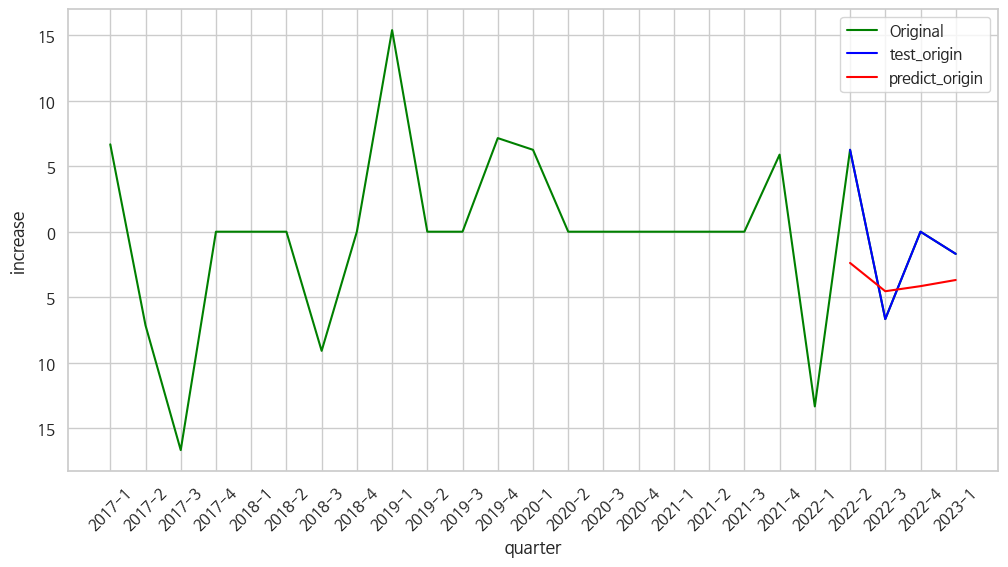

In [120]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_inte['분기'], ap_inte['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [121]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     3.164581
std      4.480837
min     -2.123904
25%      0.964267
50%      3.074116
75%      5.274430
max      8.633994
dtype: float64

In [122]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 19ms/step
[[0.3501265]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -5.444663047790527 


### 추가


In [123]:
ap_inte.loc[25] = ['2023-2', '인테리어수리리', sales, growth, increase, marketability]

<ipython-input-123-866d1d0207b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_inte.loc[25] = ['2023-2', '인테리어수리리', sales, growth, increase, marketability]


In [124]:
ap_inte

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,인테리어,1.568860e+08,1.000000,6.666667,-2.410674e+07
1,2017-2,인테리어,1.067995e+08,0.680746,-7.142857,-3.366708e+07
2,2017-3,인테리어,4.634113e+07,0.433908,-16.666667,-3.640521e+07
3,2017-4,인테리어,5.834985e+07,1.259138,0.000000,-4.265813e+07
4,2018-1,인테리어,2.487175e+08,4.262522,0.000000,-2.846679e+07
5,2018-2,인테리어,1.963478e+08,0.789441,0.000000,-3.637909e+07
6,2018-3,인테리어,1.953847e+08,0.995095,-9.090909,-2.327187e+07
7,2018-4,인테리어,1.760393e+08,0.900988,0.000000,-2.473113e+07
8,2019-1,인테리어,2.001605e+08,1.137022,15.384615,-1.501749e+07
9,2019-2,인테리어,1.924283e+08,0.961370,0.000000,-2.496063e+07


## 23년 3분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [125]:
################ 매출 ####################

### X / y 데이터 생성
X = ap_inte[['성장성', '시장성', '순점포증감률']]
y = ap_inte.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000 -2.410674e+07   6.666667
1   0.680746 -3.366708e+07  -7.142857
2   0.433908 -3.640521e+07 -16.666667
3   1.259138 -4.265813e+07   0.000000
4   4.262522 -2.846679e+07   0.000000
5   0.789441 -3.637909e+07   0.000000
6   0.995095 -2.327187e+07  -9.090909
7   0.900988 -2.473113e+07   0.000000
8   1.137022 -1.501749e+07  15.384615
9   0.961370 -2.496063e+07   0.000000
10  1.832116 -6.450694e+06   0.000000
11  1.576976  2.650721e+07   7.142857
12  1.962983  4.934945e+07   6.250000
13  0.954698  4.371653e+07   0.000000
14  1.878774  1.010198e+08   0.000000
15  0.400541  3.133567e+07   0.000000
16  0.764192  1.184999e+07   0.000000
17  0.928575  1.409878e+07   0.000000
18  0.850676  1.093290e+07   0.000000
19  1.773210  2.079760e+07   5.882353
20  0.667677  1.493840e+07 -13.333333
21  0.852893  1.033984e+07   6.250000
22  1.318673  1.406364e+07  -6.666667
23  0.725442  1.155490e+07   0.000000
24  1.047684 -2.201984e+07  -1.691830
25  0.956452

In [126]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [127]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.16756771 0.14364267 0.46721491]
 [0.14394444 0.21140206 0.35012651]]


In [128]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [129]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [130]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.0658
Epoch 1: val_loss improved from inf to 0.22892, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.0658 - val_loss: 0.2289
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.0654
Epoch 2: val_loss improved from 0.22892 to 0.22798, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.0654 - val_loss: 0.2280
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.0650
Epoch 3: val_loss improved from 0.22798 to 0.22704, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.0650 - val_loss: 0.2270
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.0646
Epoch 4: val_loss improved from 0.22704 to 0.22610, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.0646 - val_loss: 0.2261
Epoch 5/300
1/1 [=================

In [131]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 2s 2s/step
[[0.16373341]
 [0.20502204]
 [0.17853679]
 [0.18350548]]


In [132]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_inte.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.305510,0.163733
2022-4,0.214973,0.205022
2023-1,0.088680,0.178537
2023-2,0.146607,0.183505


In [133]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_inte.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_inte의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.305510,0.163733,630222188.0,359263264.0,270958924.0
2022-4,0.214973,0.205022,457189880.0,438172800.0,19017080.0
2023-1,0.088680,0.178537,215824016.0,387555040.0,-171731024.0
2023-2,0.146607,0.183505,326532032.0,397051040.0,-70519008.0


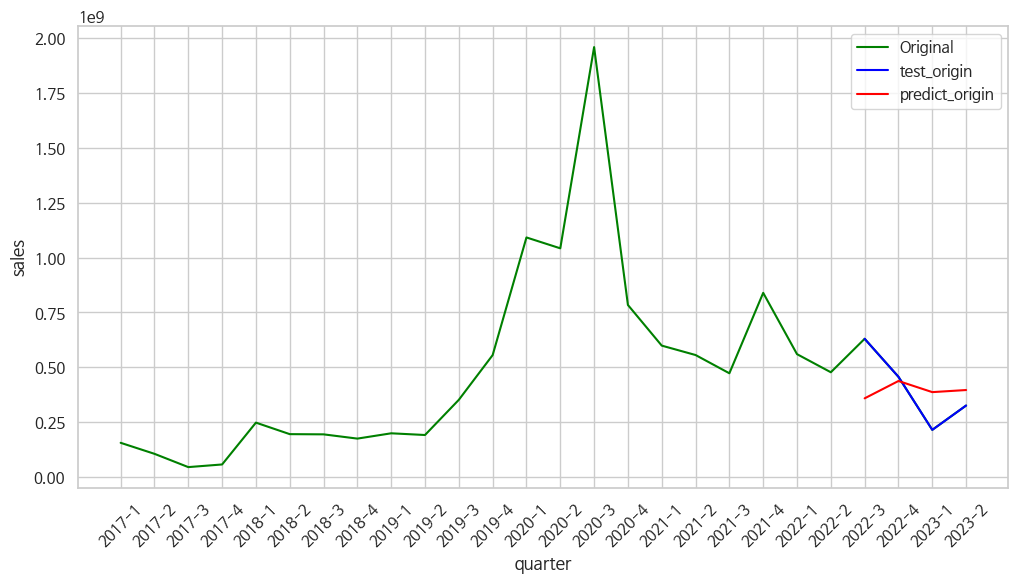

In [134]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_inte['분기'], ap_inte['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [135]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     1.193149e+07
std      1.894513e+08
min     -1.717310e+08
25%     -9.582201e+07
50%     -2.575096e+07
75%      8.200254e+07
max      2.709589e+08
dtype: float64

In [136]:
### 23년 3분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 21ms/step
[[0.16126338]]
--------------------------------------------------------------------------------
예측된 매출  : 354542624.0 


### 성장성

In [137]:
X = ap_inte[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_inte.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성     순점포증감률
0   1.568860e+08 -2.410674e+07   6.666667
1   1.067995e+08 -3.366708e+07  -7.142857
2   4.634113e+07 -3.640521e+07 -16.666667
3   5.834985e+07 -4.265813e+07   0.000000
4   2.487175e+08 -2.846679e+07   0.000000
5   1.963478e+08 -3.637909e+07   0.000000
6   1.953847e+08 -2.327187e+07  -9.090909
7   1.760393e+08 -2.473113e+07   0.000000
8   2.001605e+08 -1.501749e+07  15.384615
9   1.924283e+08 -2.496063e+07   0.000000
10  3.525508e+08 -6.450694e+06   0.000000
11  5.559643e+08  2.650721e+07   7.142857
12  1.091349e+09  4.934945e+07   6.250000
13  1.041908e+09  4.371653e+07   0.000000
14  1.957510e+09  1.010198e+08   0.000000
15  7.840633e+08  3.133567e+07   0.000000
16  5.991751e+08  1.184999e+07   0.000000
17  5.563788e+08  1.409878e+07   0.000000
18  4.732982e+08  1.093290e+07   0.000000
19  8.392573e+08  2.079760e+07   5.882353
20  5.603530e+08  1.493840e+07 -13.333333
21  4.779214e+08  1.033984e+07   6.250000
22  6.302222e+08  1.406364e+07  -6

In [138]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [139]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.08868024 0.14364267 0.46721491]
 [0.14660711 0.21140206 0.35012651]]


In [140]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [141]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [142]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1368
Epoch 1: val_loss improved from inf to 0.05111, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.1368 - val_loss: 0.0511
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1363
Epoch 2: val_loss improved from 0.05111 to 0.05068, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.1363 - val_loss: 0.0507
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1358
Epoch 3: val_loss improved from 0.05068 to 0.05025, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.1358 - val_loss: 0.0502
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1353
Epoch 4: val_loss improved from 0.05025 to 0.04983, saving model to stock_model.h5
1/1 [==============================] - 0s 71ms/step - loss: 0.1353 - val_loss: 0.0498
Epoch 5/300
1/1 [=================

In [143]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 630ms/step
[[0.12738028]
 [0.15507066]
 [0.13508655]
 [0.14480276]]


In [144]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_inte.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.237736,0.127380
2022-4,0.084128,0.155071
2023-1,0.167568,0.135087
2023-2,0.143944,0.144803


In [145]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_inte.iloc[-len(pred):, 3].values       # 성장성이 ap_inte의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.237736,0.127380,1.318673,0.892481,0.426192
2022-4,0.084128,0.155071,0.725442,0.999421,-0.273979
2023-1,0.167568,0.135087,1.047684,0.922243,0.125442
2023-2,0.143944,0.144803,0.956452,0.959767,-0.003315


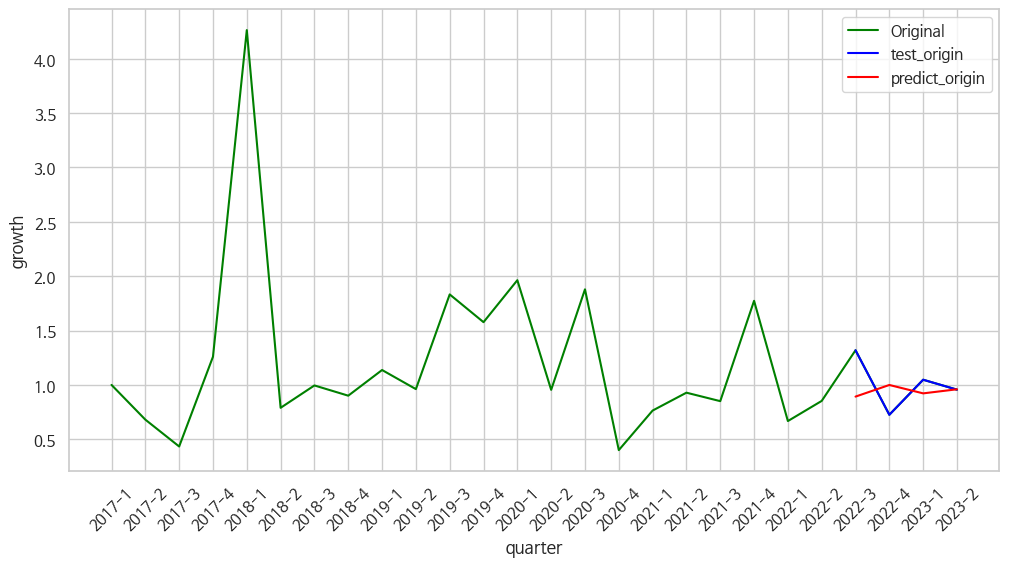

In [146]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_inte['분기'], ap_inte['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [147]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.068585
std      0.290766
min     -0.273979
25%     -0.070981
50%      0.061063
75%      0.200629
max      0.426192
dtype: float64

In [148]:
### 23년 3분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 20ms/step
[[0.13393068]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9177788496017456 


### 시장성

In [149]:
### X / y 데이터 생성
X = ap_inte[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_inte.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성     순점포증감률
0   1.568860e+08  1.000000   6.666667
1   1.067995e+08  0.680746  -7.142857
2   4.634113e+07  0.433908 -16.666667
3   5.834985e+07  1.259138   0.000000
4   2.487175e+08  4.262522   0.000000
5   1.963478e+08  0.789441   0.000000
6   1.953847e+08  0.995095  -9.090909
7   1.760393e+08  0.900988   0.000000
8   2.001605e+08  1.137022  15.384615
9   1.924283e+08  0.961370   0.000000
10  3.525508e+08  1.832116   0.000000
11  5.559643e+08  1.576976   7.142857
12  1.091349e+09  1.962983   6.250000
13  1.041908e+09  0.954698   0.000000
14  1.957510e+09  1.878774   0.000000
15  7.840633e+08  0.400541   0.000000
16  5.991751e+08  0.764192   0.000000
17  5.563788e+08  0.928575   0.000000
18  4.732982e+08  0.850676   0.000000
19  8.392573e+08  1.773210   5.882353
20  5.603530e+08  0.667677 -13.333333
21  4.779214e+08  0.852893   6.250000
22  6.302222e+08  1.318673  -6.666667
23  4.571899e+08  0.725442   0.000000
24  2.158240e+08  1.047684  -1.691830
25  3.265320

In [150]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [151]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.08868024 0.16756771 0.46721491]
 [0.14660711 0.14394444 0.35012651]]


In [152]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [153]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [154]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1059
Epoch 1: val_loss improved from inf to 0.29040, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.1059 - val_loss: 0.2904
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1054
Epoch 2: val_loss improved from 0.29040 to 0.28931, saving model to stock_model.h5
1/1 [==============================] - 0s 98ms/step - loss: 0.1054 - val_loss: 0.2893
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1049
Epoch 3: val_loss improved from 0.28931 to 0.28822, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.1049 - val_loss: 0.2882
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1044
Epoch 4: val_loss improved from 0.28822 to 0.28713, saving model to stock_model.h5
1/1 [==============================] - 0s 114ms/step - loss: 0.1044 - val_loss: 0.2871
Epoch 5/300
1/1 [================

In [155]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 2s 2s/step
[[0.21522371]
 [0.27536228]
 [0.23723018]
 [0.2448502 ]]


In [156]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_inte.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.394784,0.215224
2022-4,0.377323,0.275362
2023-1,0.143643,0.237230
2023-2,0.211402,0.244850


In [157]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_inte.iloc[-len(pred):, 5].values       # 시장성이 ap_inte의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.394784,0.215224,1.406364e+07,-11735224.00,2.579886e+07
2022-4,0.377323,0.275362,1.155490e+07,-3094636.75,1.464954e+07
2023-1,0.143643,0.237230,-2.201984e+07,-8573380.00,-1.344646e+07
2023-2,0.211402,0.244850,-1.228431e+07,-7478550.50,-4.805762e+06


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


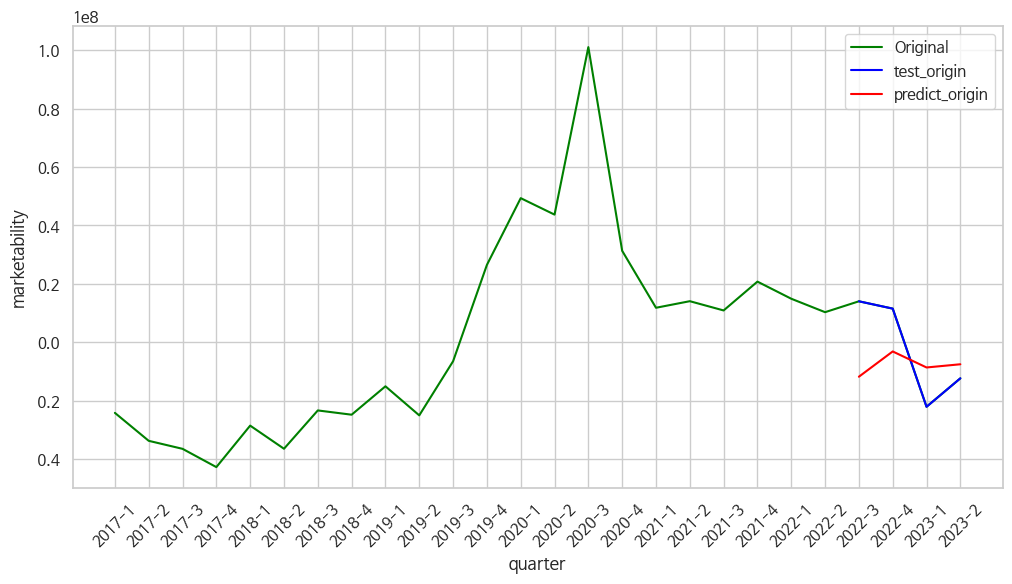

In [158]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_inte['분기'], ap_inte['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [159]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     5.549045e+06
std      1.789716e+07
min     -1.344646e+07
25%     -6.965937e+06
50%      4.921889e+06
75%      1.743687e+07
max      2.579886e+07
dtype: float64

In [160]:
### 23년 3분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 22ms/step
[[0.22133434]]
--------------------------------------------------------------------------------
예측된 시장성  : -10857262.0 


### 순점포증감률

In [161]:
### X / y 데이터 생성
X = ap_inte[['분기당_매출_금액', '성장성', '시장성']]
y = ap_inte.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   1.568860e+08  1.000000 -2.410674e+07
1   1.067995e+08  0.680746 -3.366708e+07
2   4.634113e+07  0.433908 -3.640521e+07
3   5.834985e+07  1.259138 -4.265813e+07
4   2.487175e+08  4.262522 -2.846679e+07
5   1.963478e+08  0.789441 -3.637909e+07
6   1.953847e+08  0.995095 -2.327187e+07
7   1.760393e+08  0.900988 -2.473113e+07
8   2.001605e+08  1.137022 -1.501749e+07
9   1.924283e+08  0.961370 -2.496063e+07
10  3.525508e+08  1.832116 -6.450694e+06
11  5.559643e+08  1.576976  2.650721e+07
12  1.091349e+09  1.962983  4.934945e+07
13  1.041908e+09  0.954698  4.371653e+07
14  1.957510e+09  1.878774  1.010198e+08
15  7.840633e+08  0.400541  3.133567e+07
16  5.991751e+08  0.764192  1.184999e+07
17  5.563788e+08  0.928575  1.409878e+07
18  4.732982e+08  0.850676  1.093290e+07
19  8.392573e+08  1.773210  2.079760e+07
20  5.603530e+08  0.667677  1.493840e+07
21  4.779214e+08  0.852893  1.033984e+07
22  6.302222e+08  1.318673  1.406364e+07
23  4.571899e+08

In [162]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [163]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.08868024 0.16756771 0.14364267]
 [0.14660711 0.14394444 0.21140206]]


In [164]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [165]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [166]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3474
Epoch 1: val_loss improved from inf to 0.31177, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.3474 - val_loss: 0.3118
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3465
Epoch 2: val_loss improved from 0.31177 to 0.31071, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.3465 - val_loss: 0.3107
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3457
Epoch 3: val_loss improved from 0.31071 to 0.30966, saving model to stock_model.h5
1/1 [==============================] - 0s 79ms/step - loss: 0.3457 - val_loss: 0.3097
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3449
Epoch 4: val_loss improved from 0.30966 to 0.30861, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.3449 - val_loss: 0.3086
Epoch 5/300
1/1 [=================

In [167]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 638ms/step
[[0.39670113]
 [0.4072956 ]
 [0.4223442 ]
 [0.36462525]]


In [168]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_inte.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.312000,0.396701
2022-4,0.520000,0.407296
2023-1,0.467215,0.422344
2023-2,0.350127,0.364625


In [169]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_inte.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_inte의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.312000,0.396701,-6.666667,-3.951887,-2.714780
2022-4,0.520000,0.407296,0.000000,-3.612320,3.612320
2023-1,0.467215,0.422344,-1.691830,-3.129993,1.438164
2023-2,0.350127,0.364625,-5.444663,-4.979960,-0.464703


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


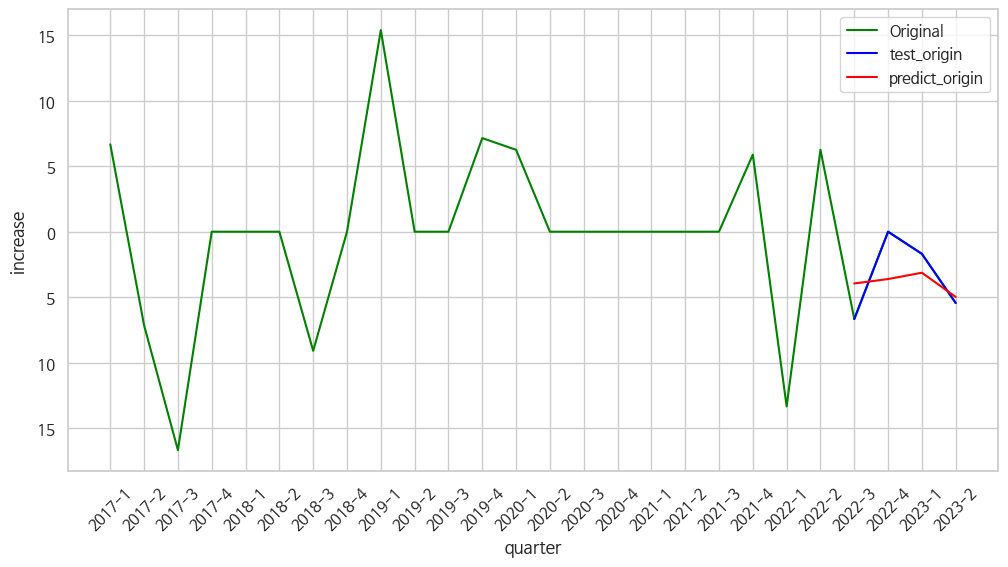

In [170]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_inte['분기'], ap_inte['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [171]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.467750
std      2.697405
min     -2.714780
25%     -1.027222
50%      0.486730
75%      1.981703
max      3.612320
dtype: float64

In [172]:
### 23년 3분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 19ms/step
[[0.3256277]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -6.2298808097839355 


### 추가

In [173]:
ap_inte.loc[26] = ['2023-3', '인테리어', sales, growth, increase, marketability]

<ipython-input-173-dc7a41fd46cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_inte.loc[26] = ['2023-3', '인테리어', sales, growth, increase, marketability]


In [174]:
ap_inte

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,인테리어,1.568860e+08,1.000000,6.666667,-2.410674e+07
1,2017-2,인테리어,1.067995e+08,0.680746,-7.142857,-3.366708e+07
2,2017-3,인테리어,4.634113e+07,0.433908,-16.666667,-3.640521e+07
3,2017-4,인테리어,5.834985e+07,1.259138,0.000000,-4.265813e+07
4,2018-1,인테리어,2.487175e+08,4.262522,0.000000,-2.846679e+07
5,2018-2,인테리어,1.963478e+08,0.789441,0.000000,-3.637909e+07
6,2018-3,인테리어,1.953847e+08,0.995095,-9.090909,-2.327187e+07
7,2018-4,인테리어,1.760393e+08,0.900988,0.000000,-2.473113e+07
8,2019-1,인테리어,2.001605e+08,1.137022,15.384615,-1.501749e+07
9,2019-2,인테리어,1.924283e+08,0.961370,0.000000,-2.496063e+07


## 23년 4분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본데이터에 추가

### 매출

In [175]:
### X / y 데이터 생성
X = ap_inte[['성장성', '시장성', '순점포증감률']]
y = ap_inte.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000 -2.410674e+07   6.666667
1   0.680746 -3.366708e+07  -7.142857
2   0.433908 -3.640521e+07 -16.666667
3   1.259138 -4.265813e+07   0.000000
4   4.262522 -2.846679e+07   0.000000
5   0.789441 -3.637909e+07   0.000000
6   0.995095 -2.327187e+07  -9.090909
7   0.900988 -2.473113e+07   0.000000
8   1.137022 -1.501749e+07  15.384615
9   0.961370 -2.496063e+07   0.000000
10  1.832116 -6.450694e+06   0.000000
11  1.576976  2.650721e+07   7.142857
12  1.962983  4.934945e+07   6.250000
13  0.954698  4.371653e+07   0.000000
14  1.878774  1.010198e+08   0.000000
15  0.400541  3.133567e+07   0.000000
16  0.764192  1.184999e+07   0.000000
17  0.928575  1.409878e+07   0.000000
18  0.850676  1.093290e+07   0.000000
19  1.773210  2.079760e+07   5.882353
20  0.667677  1.493840e+07 -13.333333
21  0.852893  1.033984e+07   6.250000
22  1.318673  1.406364e+07  -6.666667
23  0.725442  1.155490e+07   0.000000
24  1.047684 -2.201984e+07  -1.691830
25  0.956452

In [176]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [177]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.14394444 0.21140206 0.35012651]
 [0.13393067 0.22133434 0.32562772]]


In [178]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [179]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_25 (LSTM)              (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [180]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.0658
Epoch 1: val_loss improved from inf to 0.21516, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.0658 - val_loss: 0.2152
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.0654
Epoch 2: val_loss improved from 0.21516 to 0.21426, saving model to stock_model.h5
1/1 [==============================] - 0s 109ms/step - loss: 0.0654 - val_loss: 0.2143
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.0650
Epoch 3: val_loss improved from 0.21426 to 0.21336, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.0650 - val_loss: 0.2134
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.0646
Epoch 4: val_loss improved from 0.21336 to 0.21246, saving model to stock_model.h5
1/1 [==============================] - 0s 105ms/step - loss: 0.0646 - val_loss: 0.2125
Epoch 5/300
1/1 [===============

In [181]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 2s 2s/step
[[0.20502204]
 [0.17853679]
 [0.18350548]
 [0.16126336]]


In [182]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_inte.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.214973,0.205022
2023-1,0.088680,0.178537
2023-2,0.146607,0.183505
2023-3,0.161263,0.161263


In [183]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_inte.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_inte의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.214973,0.205022,457189880.0,438172800.0,19017080.0
2023-1,0.088680,0.178537,215824016.0,387555040.0,-171731024.0
2023-2,0.146607,0.183505,326532032.0,397051040.0,-70519008.0
2023-3,0.161263,0.161263,354542624.0,354542592.0,32.0


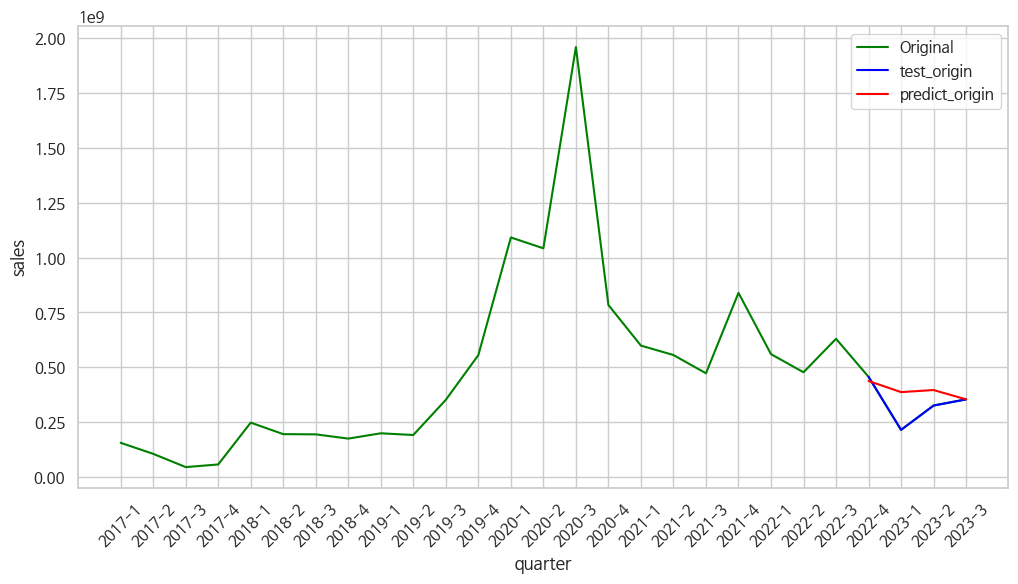

In [184]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_inte['분기'], ap_inte['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [185]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -5.580823e+07
std      8.634792e+07
min     -1.717310e+08
25%     -9.582201e+07
50%     -3.525949e+07
75%      4.754294e+06
max      1.901708e+07
dtype: float64

In [186]:
### 23년 4분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 47ms/step
[[0.15222032]]
--------------------------------------------------------------------------------
예측된 매출  : 337259840.0 


### 성장성

In [187]:
X = ap_inte[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_inte.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성     순점포증감률
0   1.568860e+08 -2.410674e+07   6.666667
1   1.067995e+08 -3.366708e+07  -7.142857
2   4.634113e+07 -3.640521e+07 -16.666667
3   5.834985e+07 -4.265813e+07   0.000000
4   2.487175e+08 -2.846679e+07   0.000000
5   1.963478e+08 -3.637909e+07   0.000000
6   1.953847e+08 -2.327187e+07  -9.090909
7   1.760393e+08 -2.473113e+07   0.000000
8   2.001605e+08 -1.501749e+07  15.384615
9   1.924283e+08 -2.496063e+07   0.000000
10  3.525508e+08 -6.450694e+06   0.000000
11  5.559643e+08  2.650721e+07   7.142857
12  1.091349e+09  4.934945e+07   6.250000
13  1.041908e+09  4.371653e+07   0.000000
14  1.957510e+09  1.010198e+08   0.000000
15  7.840633e+08  3.133567e+07   0.000000
16  5.991751e+08  1.184999e+07   0.000000
17  5.563788e+08  1.409878e+07   0.000000
18  4.732982e+08  1.093290e+07   0.000000
19  8.392573e+08  2.079760e+07   5.882353
20  5.603530e+08  1.493840e+07 -13.333333
21  4.779214e+08  1.033984e+07   6.250000
22  6.302222e+08  1.406364e+07  -6

In [188]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [189]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.14660711 0.21140206 0.35012651]
 [0.16126338 0.22133434 0.32562772]]


In [190]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [191]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_27 (LSTM)              (None, 32)                12416     
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [192]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1368
Epoch 1: val_loss improved from inf to 0.05279, saving model to stock_model.h5
1/1 [==============================] - 9s 9s/step - loss: 0.1368 - val_loss: 0.0528
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1363
Epoch 2: val_loss improved from 0.05279 to 0.05236, saving model to stock_model.h5
1/1 [==============================] - 0s 100ms/step - loss: 0.1363 - val_loss: 0.0524
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1358
Epoch 3: val_loss improved from 0.05236 to 0.05193, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.1358 - val_loss: 0.0519
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1353
Epoch 4: val_loss improved from 0.05193 to 0.05150, saving model to stock_model.h5
1/1 [==============================] - 0s 103ms/step - loss: 0.1353 - val_loss: 0.0515
Epoch 5/300
1/1 [===============

In [193]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 629ms/step
[[0.16462396]
 [0.1433868 ]
 [0.15344594]
 [0.14167115]]


In [194]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_inte.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.084128,0.164624
2023-1,0.167568,0.143387
2023-2,0.143944,0.153446
2023-3,0.133931,0.141671


In [195]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_inte.iloc[-len(pred):, 3].values       # 성장성이 ap_inte의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.084128,0.164624,0.725442,1.036316,-0.310873
2023-1,0.167568,0.143387,1.047684,0.954298,0.093386
2023-2,0.143944,0.153446,0.956452,0.993146,-0.036695
2023-3,0.133931,0.141671,0.917779,0.947672,-0.029894


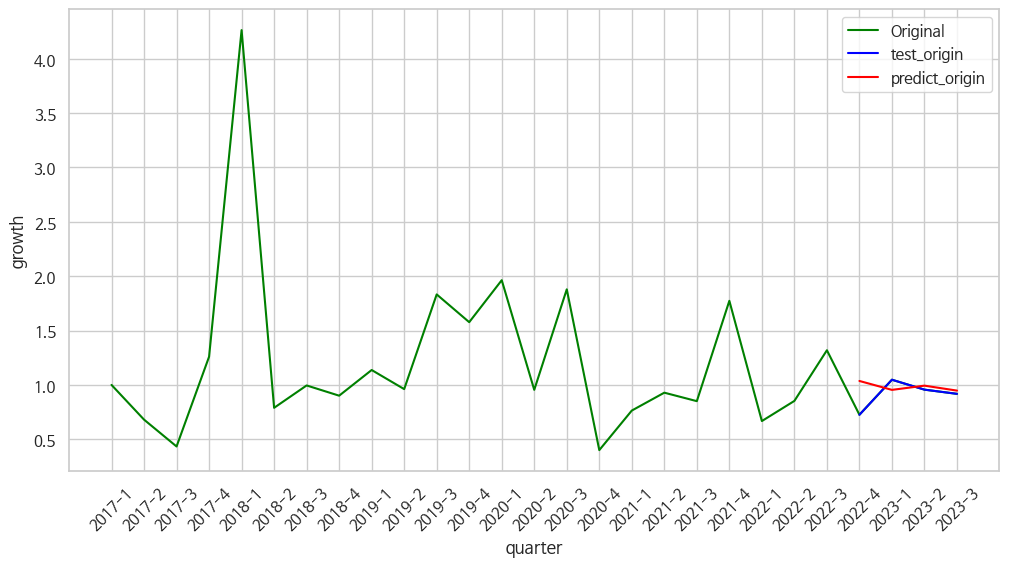

In [196]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_inte['분기'], ap_inte['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [197]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.071019
std      0.170713
min     -0.310873
25%     -0.105239
50%     -0.033294
75%      0.000926
max      0.093386
dtype: float64

In [198]:
### 23년 4분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 23ms/step
[[0.13342644]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9158315062522888 


###시장성

In [199]:
### X / y 데이터 생성
X = ap_inte[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_inte.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성     순점포증감률
0   1.568860e+08  1.000000   6.666667
1   1.067995e+08  0.680746  -7.142857
2   4.634113e+07  0.433908 -16.666667
3   5.834985e+07  1.259138   0.000000
4   2.487175e+08  4.262522   0.000000
5   1.963478e+08  0.789441   0.000000
6   1.953847e+08  0.995095  -9.090909
7   1.760393e+08  0.900988   0.000000
8   2.001605e+08  1.137022  15.384615
9   1.924283e+08  0.961370   0.000000
10  3.525508e+08  1.832116   0.000000
11  5.559643e+08  1.576976   7.142857
12  1.091349e+09  1.962983   6.250000
13  1.041908e+09  0.954698   0.000000
14  1.957510e+09  1.878774   0.000000
15  7.840633e+08  0.400541   0.000000
16  5.991751e+08  0.764192   0.000000
17  5.563788e+08  0.928575   0.000000
18  4.732982e+08  0.850676   0.000000
19  8.392573e+08  1.773210   5.882353
20  5.603530e+08  0.667677 -13.333333
21  4.779214e+08  0.852893   6.250000
22  6.302222e+08  1.318673  -6.666667
23  4.571899e+08  0.725442   0.000000
24  2.158240e+08  1.047684  -1.691830
25  3.265320

In [200]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [201]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.14660711 0.14394444 0.35012651]
 [0.16126338 0.13393067 0.32562772]]


In [202]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [203]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_29 (LSTM)              (None, 32)                12416     
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [204]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1059
Epoch 1: val_loss improved from inf to 0.27613, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1059 - val_loss: 0.2761
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1054
Epoch 2: val_loss improved from 0.27613 to 0.27508, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.1054 - val_loss: 0.2751
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1049
Epoch 3: val_loss improved from 0.27508 to 0.27404, saving model to stock_model.h5
1/1 [==============================] - 0s 71ms/step - loss: 0.1049 - val_loss: 0.2740
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1044
Epoch 4: val_loss improved from 0.27404 to 0.27300, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.1044 - val_loss: 0.2730
Epoch 5/300
1/1 [=================

In [205]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.27536228]
 [0.23723018]
 [0.2448502 ]
 [0.22133432]]


In [206]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_inte.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.377323,0.275362
2023-1,0.143643,0.237230
2023-2,0.211402,0.244850
2023-3,0.221334,0.221334


In [207]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_inte.iloc[-len(pred):, 5].values       # 시장성이 ap_inte의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.377323,0.275362,1.155490e+07,-3094636.75,1.464954e+07
2023-1,0.143643,0.237230,-2.201984e+07,-8573380.00,-1.344646e+07
2023-2,0.211402,0.244850,-1.228431e+07,-7478550.50,-4.805762e+06
2023-3,0.221334,0.221334,-1.085726e+07,-10857264.00,2.000000e+00


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


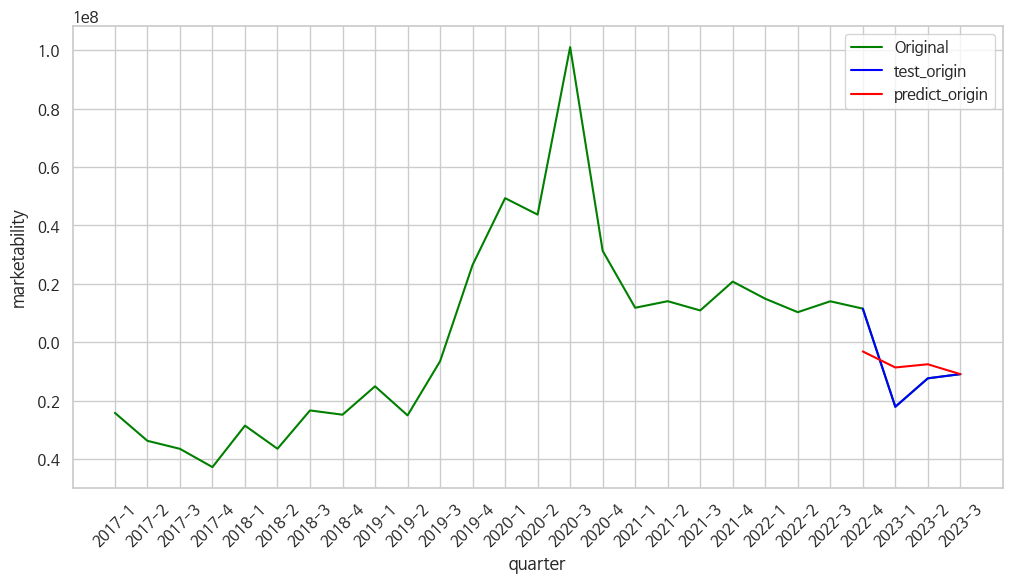

In [208]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_inte['분기'], ap_inte['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [209]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -9.006707e+05
std      1.176530e+07
min     -1.344646e+07
25%     -6.965937e+06
50%     -2.402880e+06
75%      3.662386e+06
max      1.464954e+07
dtype: float64

In [210]:
### 23년 4분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 21ms/step
[[0.20861422]]
--------------------------------------------------------------------------------
예측된 시장성  : -12684863.0 


### 순점포증감률

In [211]:
### X / y 데이터 생성
X = ap_inte[['분기당_매출_금액', '성장성', '시장성']]
y = ap_inte.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   1.568860e+08  1.000000 -2.410674e+07
1   1.067995e+08  0.680746 -3.366708e+07
2   4.634113e+07  0.433908 -3.640521e+07
3   5.834985e+07  1.259138 -4.265813e+07
4   2.487175e+08  4.262522 -2.846679e+07
5   1.963478e+08  0.789441 -3.637909e+07
6   1.953847e+08  0.995095 -2.327187e+07
7   1.760393e+08  0.900988 -2.473113e+07
8   2.001605e+08  1.137022 -1.501749e+07
9   1.924283e+08  0.961370 -2.496063e+07
10  3.525508e+08  1.832116 -6.450694e+06
11  5.559643e+08  1.576976  2.650721e+07
12  1.091349e+09  1.962983  4.934945e+07
13  1.041908e+09  0.954698  4.371653e+07
14  1.957510e+09  1.878774  1.010198e+08
15  7.840633e+08  0.400541  3.133567e+07
16  5.991751e+08  0.764192  1.184999e+07
17  5.563788e+08  0.928575  1.409878e+07
18  4.732982e+08  0.850676  1.093290e+07
19  8.392573e+08  1.773210  2.079760e+07
20  5.603530e+08  0.667677  1.493840e+07
21  4.779214e+08  0.852893  1.033984e+07
22  6.302222e+08  1.318673  1.406364e+07
23  4.571899e+08

In [212]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [213]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.14660711 0.14394444 0.21140206]
 [0.16126338 0.13393067 0.22133434]]


In [214]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [215]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_31 (LSTM)              (None, 32)                12416     
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [216]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3474
Epoch 1: val_loss improved from inf to 0.28855, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.3474 - val_loss: 0.2886
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3465
Epoch 2: val_loss improved from 0.28855 to 0.28755, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.3465 - val_loss: 0.2876
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3457
Epoch 3: val_loss improved from 0.28755 to 0.28656, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.3457 - val_loss: 0.2866
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3449
Epoch 4: val_loss improved from 0.28656 to 0.28557, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.3449 - val_loss: 0.2856
Epoch 5/300
1/1 [=================

In [217]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 594ms/step
[[0.401584  ]
 [0.41633934]
 [0.3595772 ]
 [0.32127887]]


In [218]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_inte.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.520000,0.401584
2023-1,0.467215,0.416339
2023-2,0.350127,0.359577
2023-3,0.325628,0.321279


In [219]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_inte.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_inte의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.520000,0.401584,0.000000,-3.795385,3.795385
2023-1,0.467215,0.416339,-1.691830,-3.322457,1.630628
2023-2,0.350127,0.359577,-5.444663,-5.141756,-0.302907
2023-3,0.325628,0.321279,-6.229881,-6.369267,0.139386


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


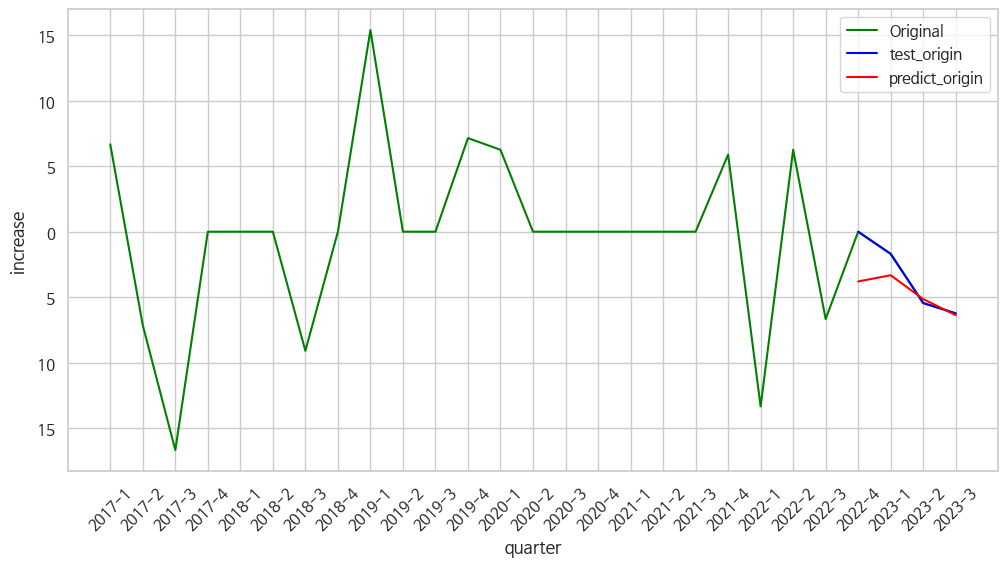

In [220]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_inte['분기'], ap_inte['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [221]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     1.315623
std      1.848569
min     -0.302907
25%      0.028813
50%      0.885007
75%      2.171817
max      3.795385
dtype: float64

In [222]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 23ms/step
[[0.33720258]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -5.858891487121582 


### 추가

In [223]:
ap_inte.loc[27] = ['2023-4', '인테리어', sales, growth, increase, marketability]

<ipython-input-223-dabf0ade5233>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_inte.loc[27] = ['2023-4', '인테리어', sales, growth, increase, marketability]


In [224]:
final_ap_inte = ap_inte
final_ap_inte

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,인테리어,1.568860e+08,1.000000,6.666667,-2.410674e+07
1,2017-2,인테리어,1.067995e+08,0.680746,-7.142857,-3.366708e+07
2,2017-3,인테리어,4.634113e+07,0.433908,-16.666667,-3.640521e+07
3,2017-4,인테리어,5.834985e+07,1.259138,0.000000,-4.265813e+07
4,2018-1,인테리어,2.487175e+08,4.262522,0.000000,-2.846679e+07
5,2018-2,인테리어,1.963478e+08,0.789441,0.000000,-3.637909e+07
6,2018-3,인테리어,1.953847e+08,0.995095,-9.090909,-2.327187e+07
7,2018-4,인테리어,1.760393e+08,0.900988,0.000000,-2.473113e+07
8,2019-1,인테리어,2.001605e+08,1.137022,15.384615,-1.501749e+07
9,2019-2,인테리어,1.924283e+08,0.961370,0.000000,-2.496063e+07


## 최종결과

In [225]:
### X / y 데이터 생성
X = ap_inte[['성장성', '시장성', '순점포증감률']]
y = ap_inte.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000 -2.410674e+07   6.666667
1   0.680746 -3.366708e+07  -7.142857
2   0.433908 -3.640521e+07 -16.666667
3   1.259138 -4.265813e+07   0.000000
4   4.262522 -2.846679e+07   0.000000
5   0.789441 -3.637909e+07   0.000000
6   0.995095 -2.327187e+07  -9.090909
7   0.900988 -2.473113e+07   0.000000
8   1.137022 -1.501749e+07  15.384615
9   0.961370 -2.496063e+07   0.000000
10  1.832116 -6.450694e+06   0.000000
11  1.576976  2.650721e+07   7.142857
12  1.962983  4.934945e+07   6.250000
13  0.954698  4.371653e+07   0.000000
14  1.878774  1.010198e+08   0.000000
15  0.400541  3.133567e+07   0.000000
16  0.764192  1.184999e+07   0.000000
17  0.928575  1.409878e+07   0.000000
18  0.850676  1.093290e+07   0.000000
19  1.773210  2.079760e+07   5.882353
20  0.667677  1.493840e+07 -13.333333
21  0.852893  1.033984e+07   6.250000
22  1.318673  1.406364e+07  -6.666667
23  0.725442  1.155490e+07   0.000000
24  1.047684 -2.201984e+07  -1.691830
25  0.956452

In [226]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (28, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (28, 1)


In [227]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (26, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (26, 1)
[[0.13393067 0.22133434 0.32562772]
 [0.13342644 0.20861422 0.33720259]]


In [228]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (22, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (22, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [229]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_33 (LSTM)              (None, 32)                12416     
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [230]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1429
Epoch 1: val_loss improved from inf to 0.10296, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1429 - val_loss: 0.1030
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1423
Epoch 2: val_loss improved from 0.10296 to 0.10227, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.1423 - val_loss: 0.1023
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1418
Epoch 3: val_loss improved from 0.10227 to 0.10159, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.1418 - val_loss: 0.1016
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1412
Epoch 4: val_loss improved from 0.10159 to 0.10091, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.1412 - val_loss: 0.1009
Epoch 5/300
1/1 [=================

In [231]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.24492463]
 [0.25159824]
 [0.22155733]
 [0.20956169]]


In [232]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_inte.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2023-1,0.088680,0.244925
2023-2,0.146607,0.251598
2023-3,0.161263,0.221557
2023-4,0.152220,0.209562


In [233]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_inte.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_inte의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2023-1,0.088680,0.244925,215824016.0,514433376.0,-298609360.0
2023-2,0.146607,0.251598,326532032.0,527187744.0,-200655712.0
2023-3,0.161263,0.221557,354542624.0,469774560.0,-115231936.0
2023-4,0.152220,0.209562,337259840.0,446848864.0,-109589024.0


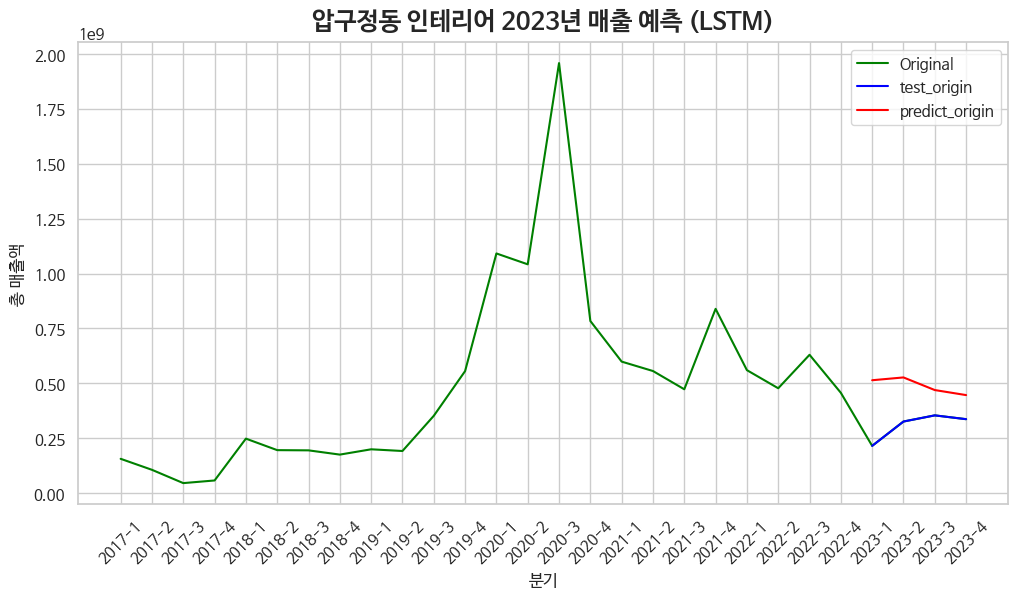

In [234]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.title('압구정동 인테리어 2023년 매출 예측 (LSTM)', fontsize = 18, fontweight='bold', pad =10)


plt.plot(ap_inte['분기'], ap_inte['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('분기')
plt.ylabel('총 매출액')
plt.legend()
plt.show()